In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# enter "dat" directory, enter all subdirectories with name ending in "1","2","3" and load all csv files
# with name n into a list of dataframes
def load_data(n: str):
    data = [[],[],[]]
    for root, dirs, files in os.walk("dat"):
        for dir in dirs:
            if dir[-1] in ["1","2","3"]:
                for file in os.listdir(os.path.join(root,dir)):
                    if file == n:
                        data[int(dir[-1]) - 1].append(pd.read_csv(os.path.join(root,dir,file)))
    return data

In [13]:
populations = load_data("population.csv")
experiment_data = load_data("experiment.csv")

In [8]:
example_population = populations[0][25]
example_experiment = experiment_data[0][25]

# add column to example_population with value = index // 27
example_population["tick"] = example_population.index // 27

#column names of example_population
example_population[" Population Every 100 Ticks"].dtype

# plot population of example_population grouped by Arena on the same plot
example_population.groupby("Arena")[" Population Every 100 Ticks"].plot(legend=True)

IndexError: list index out of range

In [22]:
#loop through populations and save indices of dataframes with length != 105300
indices = []
for i in range(len(populations)):
    for j in range(len(populations[i])):
        if len(populations[i][j]) != 105300:
            indices.append((i,j))

# remove these indices from populations and experiment_data
for i in range(len(indices)):
    populations[indices[i][0]].pop(indices[i][1])
    experiment_data[indices[i][0]].pop(indices[i][1])
    
#Re-write the above code in one loop
for i in range(len(experiment_data)):
    for j in range(len(experiment_data[i])):
        experiment_data[i][j].columns = experiment_data[i][j].columns.str.strip()
        #experiment_data[i][j]["Cooperator"] = np.where((experiment_data[i][j]["FoodGivenToOthers"] - experiment_data[i][j]["FoodTakenFromOthers"]) > 0, 1, 0)
        #experiment_data[i][j]["Cooperator"] = experiment_data[i][j]["GeneSequence"].str.count("6|8") > experiment_data[i][j]["GeneSequence"].str.count("3|7")
        #experiment_data[i][j]["Cooperator"] = np.where(experiment_data[i][j]["FoodGivenToOthers"] > 0, 1, 0)
        experiment_data[i][j]["Cooperator"] = experiment_data[i][j]["GeneSequence"].str.count("6|8") > 8
        experiment_data[i][j].loc[experiment_data[i][j]["DeathTime"] == 2147483647, "DeathTime"] = ((experiment_data[i][j]["BirthTime"] // 30000 ) +  1) * 30000

Text(0.5, 1.0, 'Proportion of Cooperators at Each Dispersal Event')

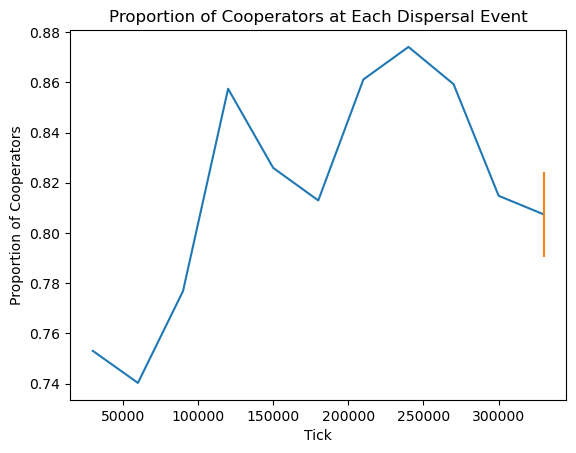

In [19]:
example = experiment_data[0][0]

#Plot the proportion of alive agents that are cooperators at each dispersal event as a line plot
#each dispersal event is 29999 ticks long
#the final point should have error bars
x = [i for i in range(0, 12*30000, 30000)]
y = []
for i in x:
    y.append(example.loc[(example["BirthTime"] < i) & (example["DeathTime"] > i), "Cooperator"].mean())

plt.plot(x,y)

#add error bar
plt.errorbar(x[-1], y[-1], yerr=example.loc[(example["BirthTime"] < x[-1]) & (example["DeathTime"] > x[-1]), "Cooperator"].sem())

plt.xlabel("Tick")
plt.ylabel("Proportion of Cooperators")
plt.title("Proportion of Cooperators at Each Dispersal Event")

In [11]:
examples = [experiment_data[0][0], experiment_data[1][0], experiment_data[2][0]]

#Plot the proportion of alive agents that are cooperators at each dispersal event as a line plot
#each dispersal event is 29999 ticks long
#the final point should have error bars
x = [i for i in range(0, 12*30000, 30000)]
y = [[]] * 3
for i in range(len(examples)):
    for j in x:
        y[i].append(examples[i].loc[(examples[i]["BirthTime"] < j) & (examples[i]["DeathTime"] > j), "Cooperator"].mean())

experiment_data[1][0]

,Arena,GeneSequence,Agent,Genitor,GenerationNum,FoodCollected,BirthTime,DeathTime,StartArena,LastArena,AttackEvents,DefenceEvents,NumOffspring,VisibleAgentsAtDeath,FoodEaten,FoodGivenToOthers,FoodTakenFromOthers,Cooperator
0,Arena24,0.4.7.0.7.3.4.0.5.4.0.0.6.3.3.6.5.4.0.0.3.0.8....,Agent482,NaN,0,0,1,1667,24,24,0,0,0,0,0.0000,0.00000,0.000000,0
1,Arena16,5.8.5.1.8.5.0.3.2.2.7.6.7.4.7.7.8.4.4.0.3.3.3....,Agent333,NaN,0,0,1,1718,16,16,0,0,0,0,0.0000,0.00000,0.000000,0
2,Arena13,0.3.7.3.8.8.3.6.0.0.3.4.5.7.3.4.1.4.5.4.3.7.7....,Agent280,NaN,0,0,1,1773,13,13,0,0,0,0,0.0000,0.00000,0.000000,0
3,Arena2,3.1.0.7.2.7.5.2.2.5.7.6.0.8.8.4.8.3.3.8.0.6.4....,Agent41,NaN,0,0,1,1831,2,2,0,0,0,0,0.0000,0.00000,0.000000,0
4,Arena6,5.0.2.7.1.7.6.3.4.4.1.0.6.2.1.8.1.2.7.1.6.0.0....,Agent131,NaN,0,0,1,1831,6,6,0,0,0,0,0.0000,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100908,Arena10,1.7.7.2.1.1.5.4.0.4.0.6.0.7.1.1.2.2.0.1.1.0.8....,Agent100897,Agent98572,78,3,388044,390000,10,10,1,2,1,0,133.5000,16.50000,17.985000,0
100909,Arena25,0.4.8.0.1.4.4.1.1.1.5.7.0.5.7.6.5.0.7.0.4.4.3....,Agent101141,Agent100999,77,1,388837,390000,25,25,0,0,0,0,53.4000,6.60000,9.900001,0
100910,Arena8,1.1.1.1.2.0.7.4.8.1.1.5.1.8.4.8.3.2.1.2.6.0.0....,Agent101314,Agent100882,91,0,389443,390000,8,8,0,0,0,0,0.0000,0.00000,0.000000,0
100911,Arena18,5.6.6.6.1.5.1.1.1.1.7.7.7.1.4.0.7.7.3.1.5.7.0....,Agent101350,Agent99679,86,1,389634,390000,18,18,1,1,0,0,52.0140,7.98600,2.662000,1


In [23]:
#Create dataframe with columns "Dispersal Event", "Mean", "Standard Error", "Arena", "Scenario"
#where "Dispersal Event" is the dispersal event number, "Mean" is the mean proportion of cooperators at that dispersal event, "Standard Error" is the standard error of the mean, "Arena" is the arena number, and "Scenario" is the scenario number
PCop = pd.DataFrame(columns=["Dispersal Event", "Mean", "Standard Error", "Arena", "Scenario"])
for scenario in range(len(experiment_data)):
    for arena in range(len(experiment_data[scenario])):
        for i in range(12):
            row = {"Dispersal Event": i, "Mean": experiment_data[scenario][arena].loc[(experiment_data[scenario][arena]["BirthTime"] <= i*30000) & (experiment_data[scenario][arena]["DeathTime"] > i*30000), "Cooperator"].mean(), "Standard Error": experiment_data[scenario][arena].loc[(experiment_data[scenario][arena]["BirthTime"] < i*30000) & (experiment_data[scenario][arena]["DeathTime"] > i*30000), "Cooperator"].sem(), "Arena": arena, "Scenario": scenario}
            PCop = pd.concat([PCop, pd.DataFrame(row, index=[0])], ignore_index=True)

#Do the above plot for each list of dataframes in experiment_data using a different plot for each list
#add a legend to each plot
"""
for scenario in experiment_data:
    for experiment in scenario:
        x = [i for i in range(0, 12*30000, 30000)]
        y = []
        for i in x:
            y.append(experiment.loc[(experiment["BirthTime"] < i) & (experiment["DeathTime"] > i), "Cooperator"].mean())
        plt.plot(x,y)
    plt.xlabel("Tick")
    plt.ylabel("Proportion of Cooperators")
    plt.title("Proportion of Cooperators at Each Dispersal Event")
"""

#Set Mean = 0.5, Standard Error = 0 for all rows where Mean is NaN
PCop.loc[PCop["Mean"].isna(), "Mean"] = 0.5
PCop.loc[PCop["Standard Error"].isna(), "Standard Error"] = 0
PCop

,Dispersal Event,Mean,Standard Error,Arena,Scenario
0,0,0.500000,0.000000,0,0
1,1,0.362963,0.023923,0,0
2,2,0.346241,0.022733,0,0
3,3,0.427686,0.022512,0,0
4,4,0.468519,0.021494,0,0
...,...,...,...,...,...
379,7,0.462963,0.021477,9,2
380,8,0.462963,0.021477,9,2
381,9,0.412963,0.021208,9,2
382,10,0.300000,0.019739,9,2


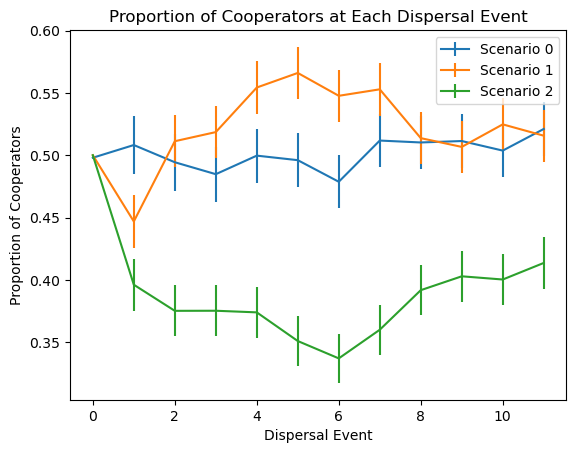

In [24]:
#Plot mean proportion of cooperators at each dispersal event for each scenario
#add error bars
#add a legend
x = [i for i in range(12)]
Y = []
for scenario in range(len(experiment_data)):
    subset = PCop.loc[PCop["Scenario"] == scenario]
    #calculate mean and standard error for each dispersal event
    y = []
    yerr = []
    for i in x:
        y.append(subset.loc[subset["Dispersal Event"] == i, "Mean"].mean())
        yerr.append(subset.loc[subset["Dispersal Event"] == i, "Standard Error"].mean())
    Y.append(y)
    
    plt.errorbar(x, y, yerr=yerr, label="Scenario " + str(scenario))
    plt.xlabel("Dispersal Event")
    plt.ylabel("Proportion of Cooperators")
    plt.title("Proportion of Cooperators at Each Dispersal Event")
    plt.legend()



[0.4852469135802469,
 0.3858667456953997,
 0.4200150410939499,
 0.43981942744734714,
 0.44334324930300417,
 0.44343784943292025,
 0.4456273911595655,
 0.460118861920207,
 0.45355396793122343,
 0.4589295245914433,
 0.4611982479406122,
 0.4572264274306349]

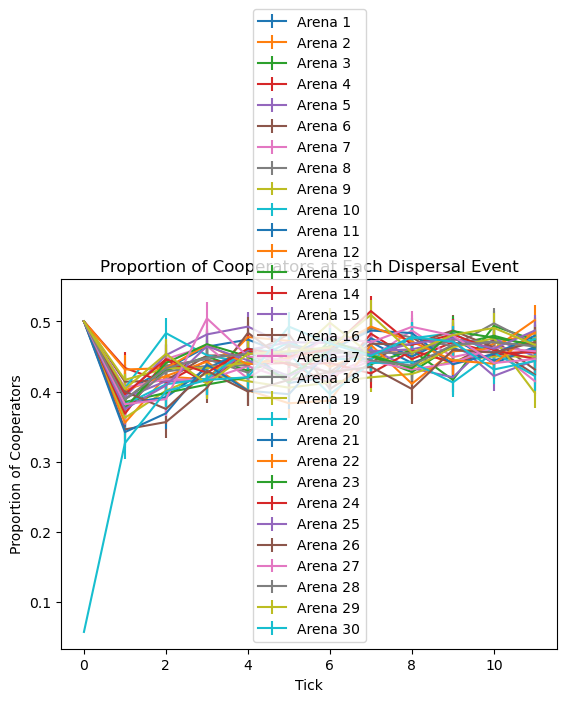

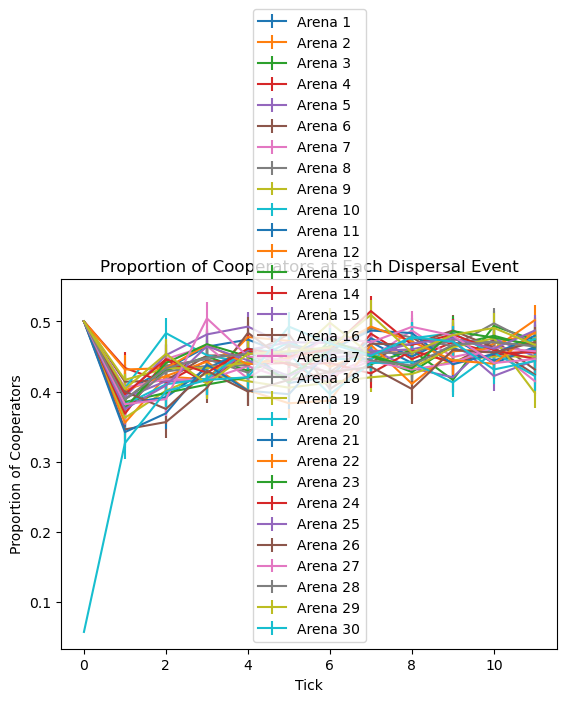

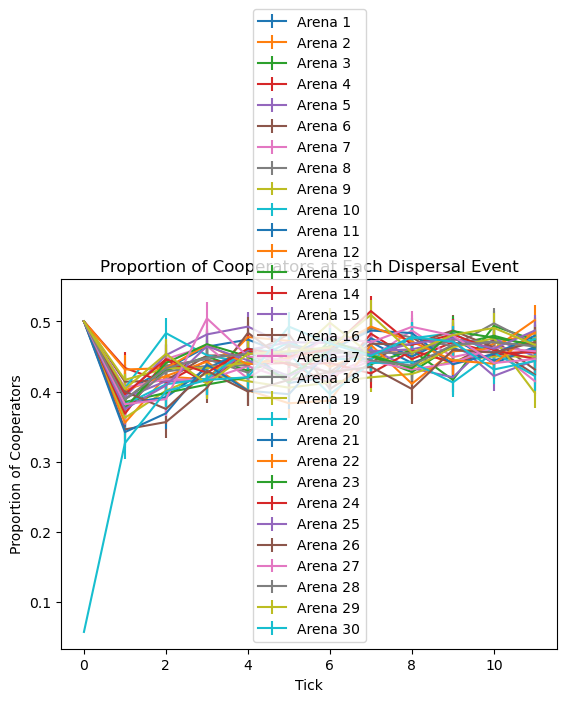

In [12]:
#Plot the mean proportion of cooperators at each dispersal event as a line plot with error bars

for scenario in range(len(experiment_data)):
    for arena in range(len(experiment_data[scenario])):
        plt.errorbar(PCop.loc[(PCop["Arena"] == arena) & (PCop["Scenario"] == scenario), "Dispersal Event"], PCop.loc[(PCop["Arena"] == arena) & (PCop["Scenario"] == scenario), "Mean"], yerr=PCop.loc[(PCop["Arena"] == arena) & (PCop["Scenario"] == scenario), "Standard Error"], label="Arena " + str(arena + 1))
    plt.xlabel("Tick")
    plt.ylabel("Proportion of Cooperators")
    plt.title("Proportion of Cooperators at Each Dispersal Event")
    plt.legend()
    plt.show()